In [1]:
# !conda install pytorch torchvision cudatoolkit=11.3 -c pytorch -y

In [4]:
# cloning yolov5

# !git clone https://github.com/ultralytics/yolov5  
# %cd yolov5
# %pip install -qr requirements.txt

In [1]:
%cd yolov5
import torch
from yolov5 import utils
import torch
import utils
from IPython import display
from IPython.display import clear_output
from pathlib import Path
import yaml
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob


%matplotlib inline
display = utils.notebook_init()

YOLOv5 🚀 v7.0-192-g459dd49 Python-3.10.9 torch-2.0.1 CPU


Setup complete ✅ (12 CPUs, 46.9 GB RAM, 294.3/456.9 GB disk)


In [2]:
!cat data/cattle_belly_and_head_data.yaml
print ('---------------------------------------------')


train: ../datasets/cattle_belly_head/images/train
val: ../datasets/cattle_belly_head/images/valid
test: ../datasets/cattle_belly_head/images/test

nc: 2
names:
  0: belly
  1: head
---------------------------------------------


In [3]:
# !python segment/train.py --batch 20 --epochs 250 --data 'data/cattle_belly_and_head_data.yaml' --weights 'yolov5s-seg.pt' --weights 'runs_cattle_belly_head/best/best.pt' --project 'runs_cattle_belly_head' --name 'feature_extraction' --cache --freeze 12

In [5]:
!python segment/train.py --patience 0 --batch 10 --epochs 10 --data 'data/cattle_belly_and_head_data.yaml' --weights 'runs_cattle_belly_head/best/best.pt' --project 'runs_cattle_belly_head' --name 'feature_extraction' --cache
# clear_output() 

segment/train: weights=runs_cattle_belly_head/best/best.pt, cfg=, data=data/cattle_belly_and_head_data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=10, batch_size=10, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs_cattle_belly_head, name=feature_extraction, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=0, freeze=[0], save_period=-1, seed=0, local_rank=-1, mask_ratio=4, no_overlap=False
github: ⚠️ YOLOv5 is out of date by 91 commits. Use 'git pull' or 'git clone https://github.com/ultralytics/yolov5' to update.
[Errno 2] No such file or directory: '/home/lponce/anaconda3/envs/yolov5/lib/python3.10/site-packages/numpy-1.25.0.dist-info/METADATA'
YOLOv5 🚀 v7.0-192-g459dd49 Python-3.10.9 torch-2.0.1 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, we

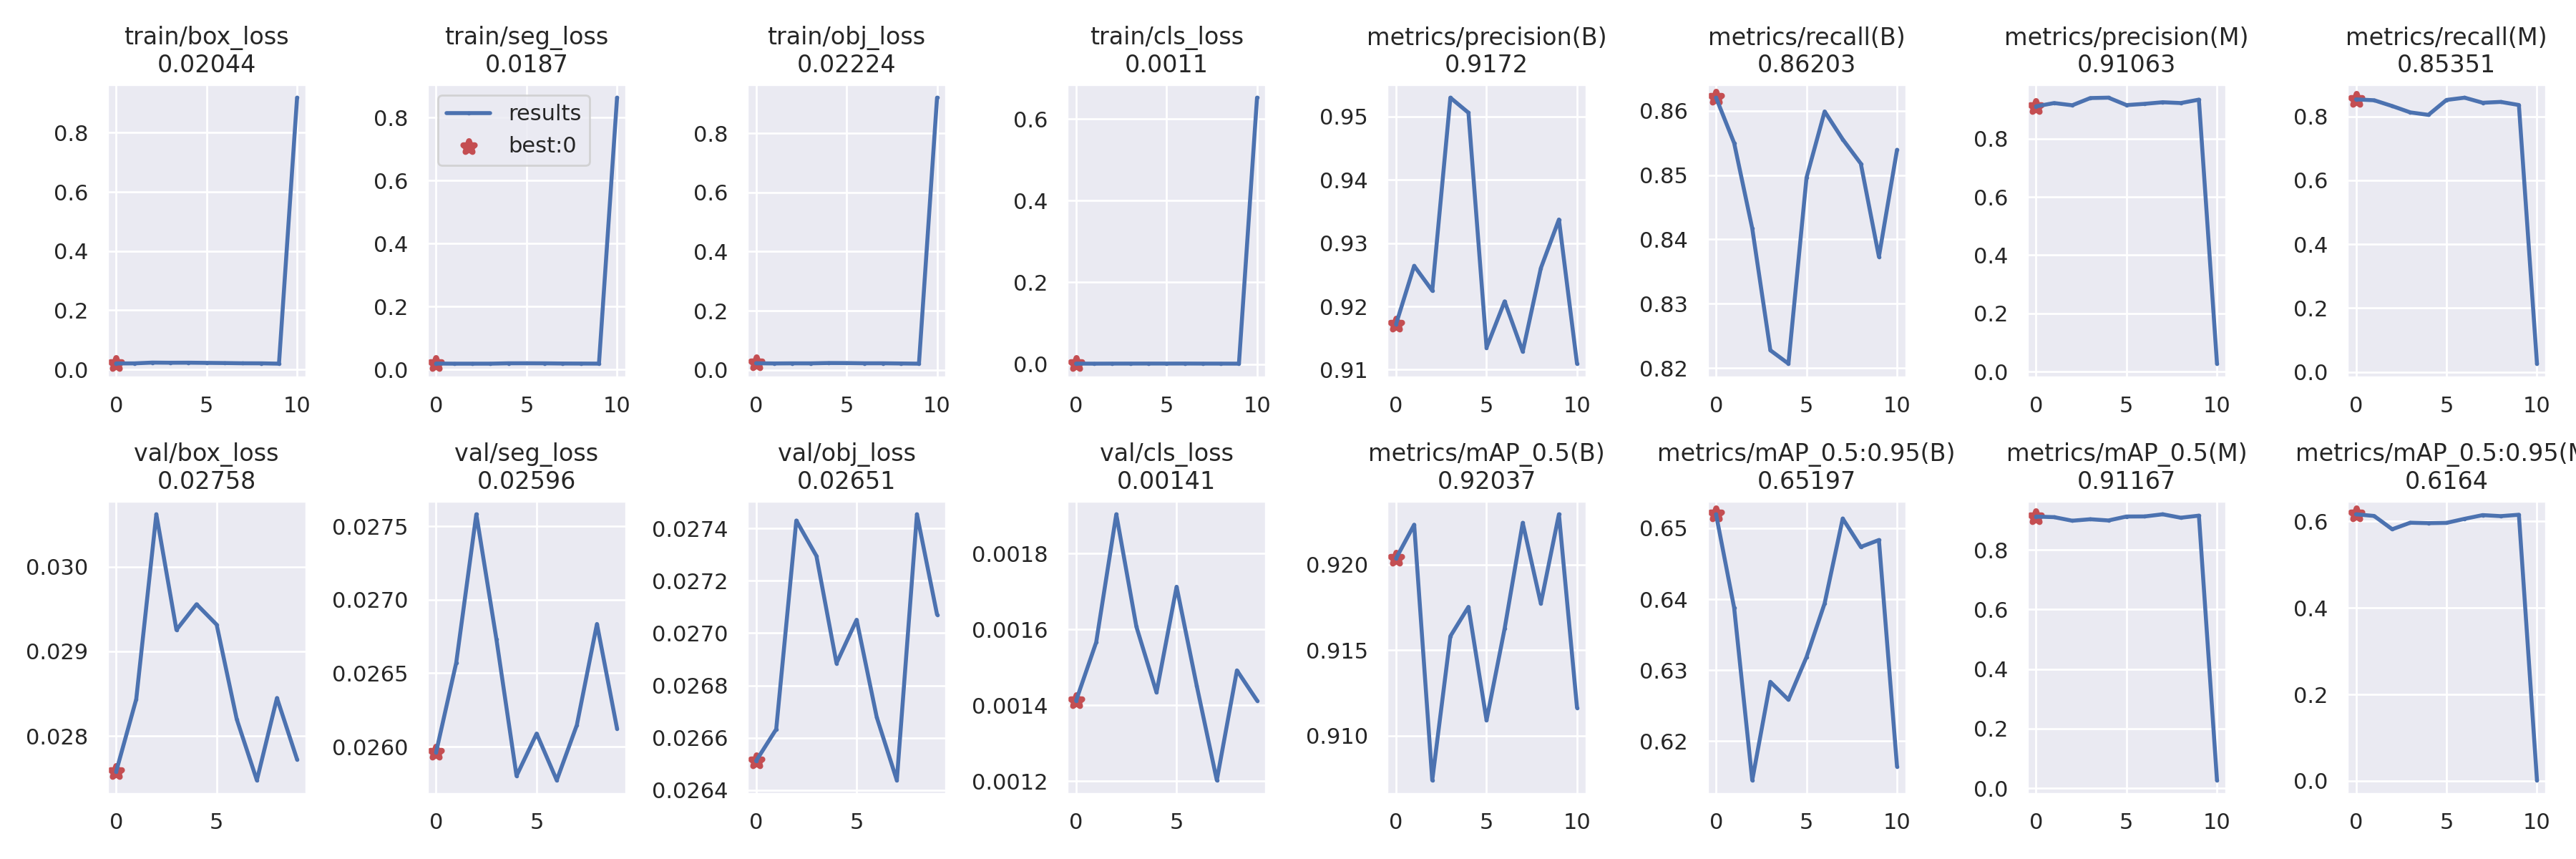

In [6]:
display.Image(f"runs_cattle_belly_head/feature_extraction/results.png")

In [7]:
!python segment/val.py --weights 'runs_cattle_belly_head/feature_extraction/weights/best.pt' --data 'data/cattle_belly_data.yaml' --project 'runs_cattle_belly_head'
clear_output()

In [8]:
!python segment/predict.py --weights 'runs_cattle_belly_head/feature_extraction/weights/best.pt'  --conf 0.5 --source '../datasets/cattle_belly_head/images/test' --project 'runs_cattle_belly_head' --name 'detect_test' --img-size 600
clear_output()

In [9]:
# !python segment/predict.py --weights 'runs_cattle_belly_head/feature_extraction/weights/best.pt'  --conf 0.5 --source '../datasets/cattle_belly_head/images/input_video4' --project 'runs_cattle_belly_head' --name 'detect_test_video' --img-size 500
# clear_output()

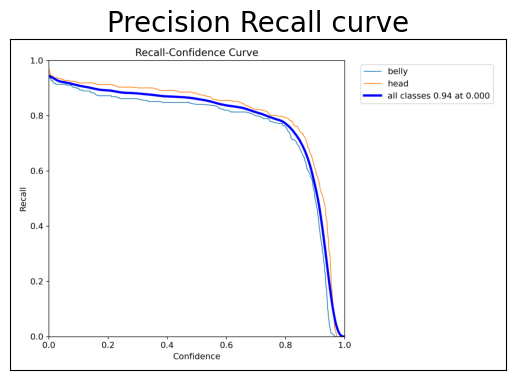

In [10]:
plt.plot(figsize=(20,20))
plt.title('Precision Recall curve', fontsize=20)
plt.tick_params(left = False, right = False , labelleft = False, labelbottom = False, bottom = False)
plt.imshow(mpimg.imread('runs_cattle_belly_head/feature_extraction/BoxR_curve.png'))

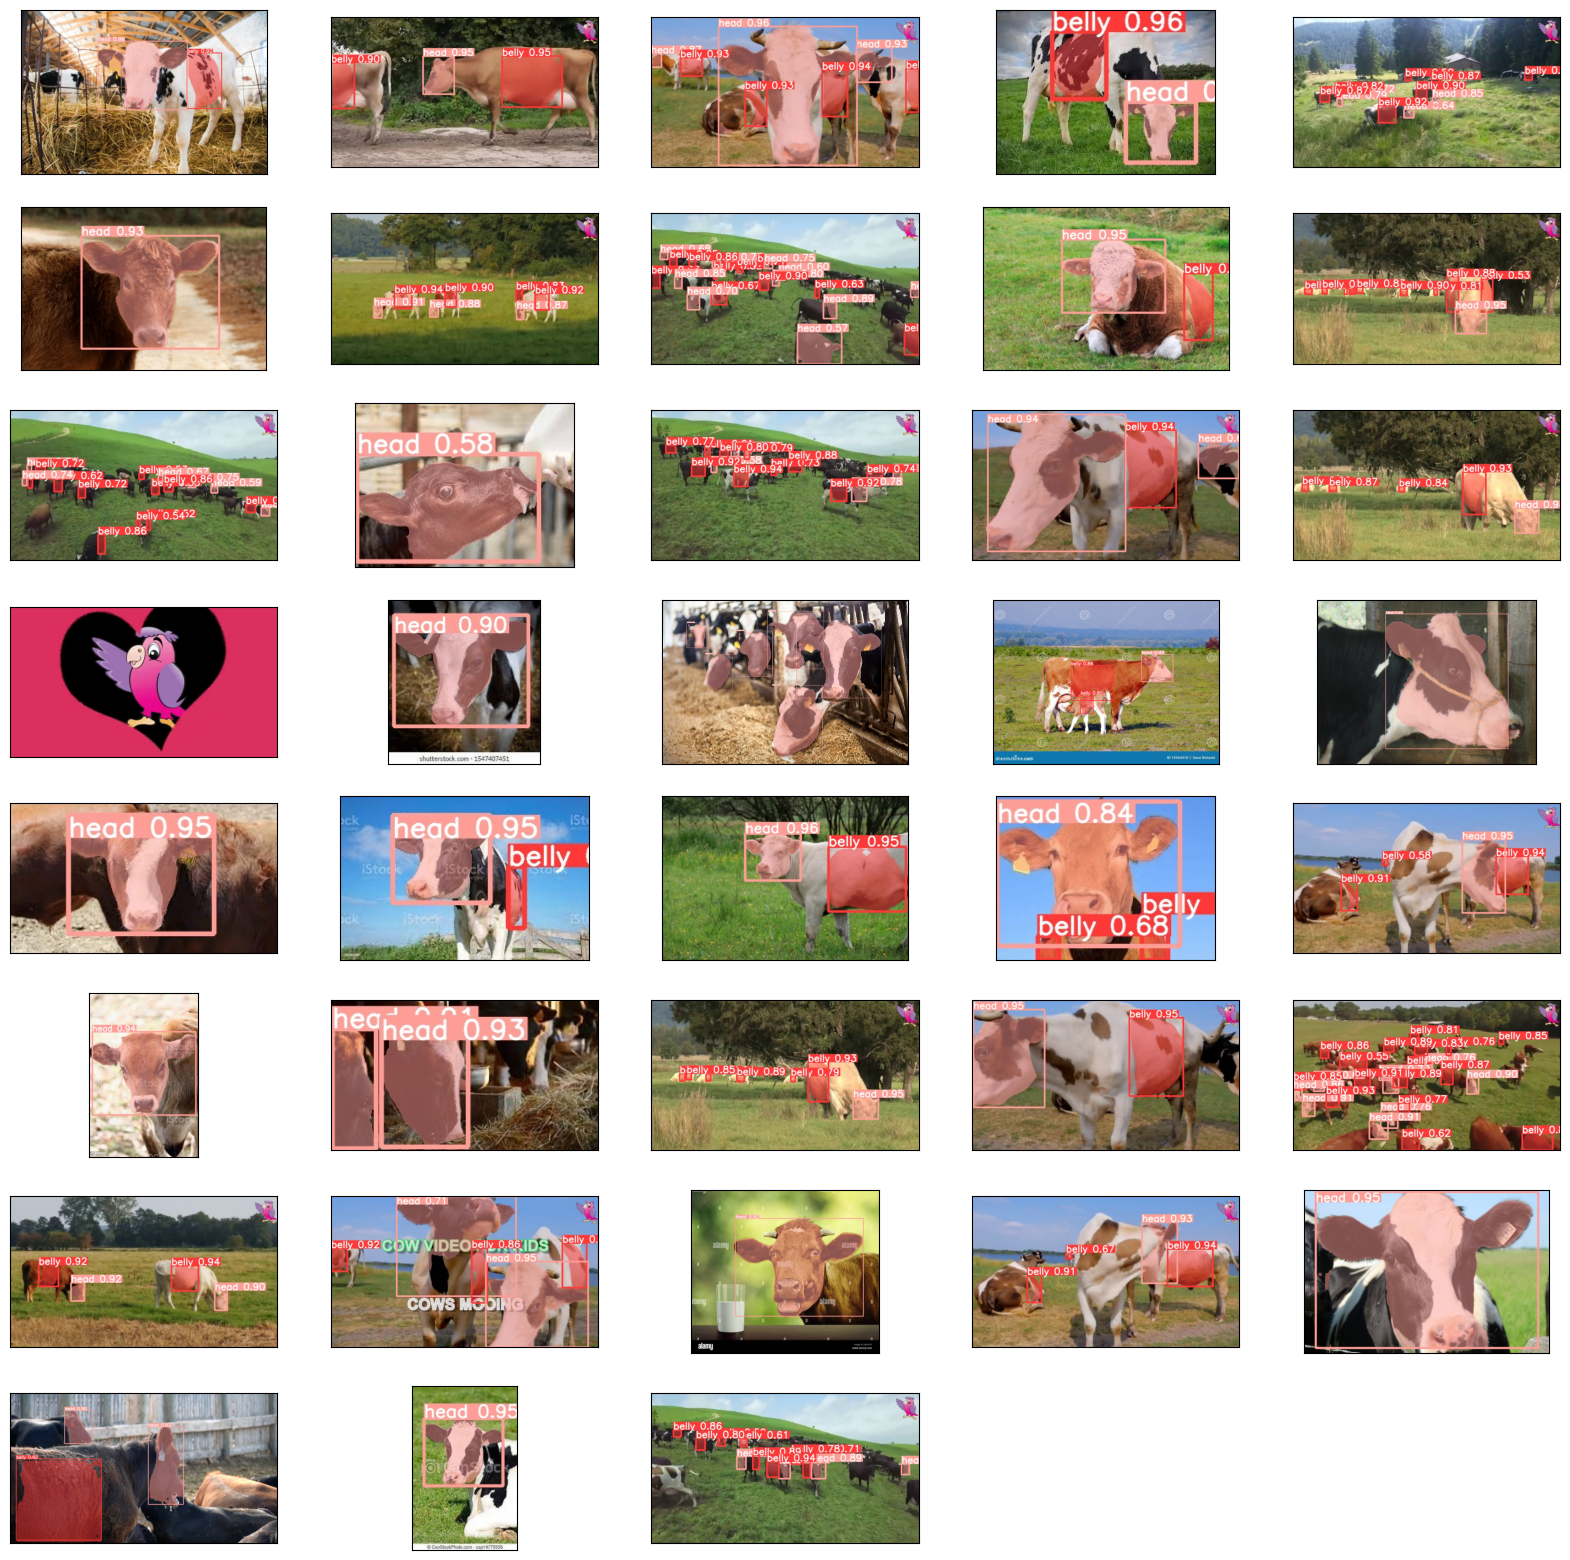

In [12]:
detect_path = r'runs_cattle_belly_head/detect_test'

images = []
for img_path in glob.glob(detect_path + '/*.jpg'):
    images.append(mpimg.imread(img_path))

plt.figure(figsize=(20,20))
columns = 5
for i, image in enumerate(images):
    plt.subplot((int(len(images) / columns + 1)), columns, i + 1)
    plt.tick_params(left = False, right = False , labelleft = False, labelbottom = False, bottom = False)
    plt.imshow(image)
plt.show()